<a href="https://colab.research.google.com/github/nileshmalode11/Python_Mini_projects/blob/main/eda_on_bank_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("/content/drive/MyDrive/churn.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
new_df = df.drop(columns=['RowNumber','CustomerId','Surname'])
new_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
new_df.duplicated().sum()

0

In [ ]:
new_df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
numeric = ['float64','int64']

df_numerical = new_df.select_dtypes(include=numeric)
column_numerical = df_numerical.columns

df_categorical = new_df.select_dtypes('object')
column_categorical = df_categorical.columns

In [6]:
df_numerical.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df_categorical.tail()

,Geography,Gender
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male
9999,France,Female


In [8]:
encoder = LabelEncoder()
new_df["Geography"] = encoder.fit_transform(new_df["Geography"])
new_df["Gender"] = encoder.fit_transform(new_df["Gender"])

In [9]:
new_df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

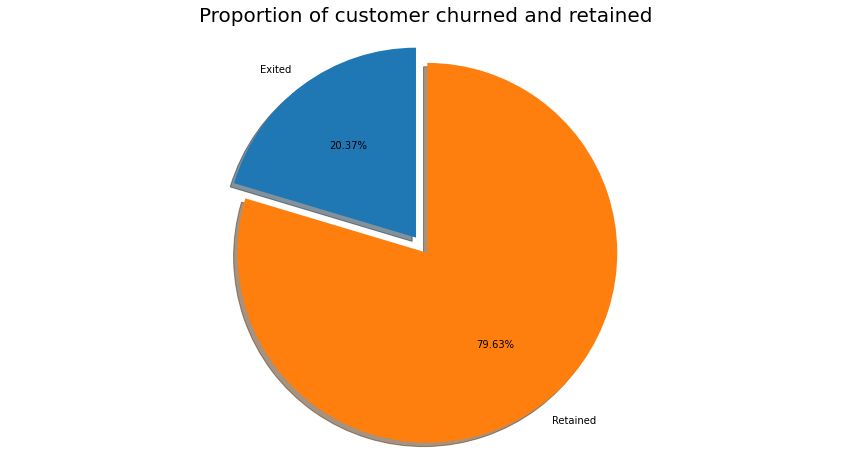

In [ ]:
labels = 'Exited', 'Retained'
sizes = [new_df.Exited[df['Exited']==1].count(), new_df.Exited[new_df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(15, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

So about 20% of the customers have churned. So the baseline model could be to predict that 20% of the customers will churn. Given 20% is a small number, we need to ensure that the chosen model does predict with great accuracy this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.

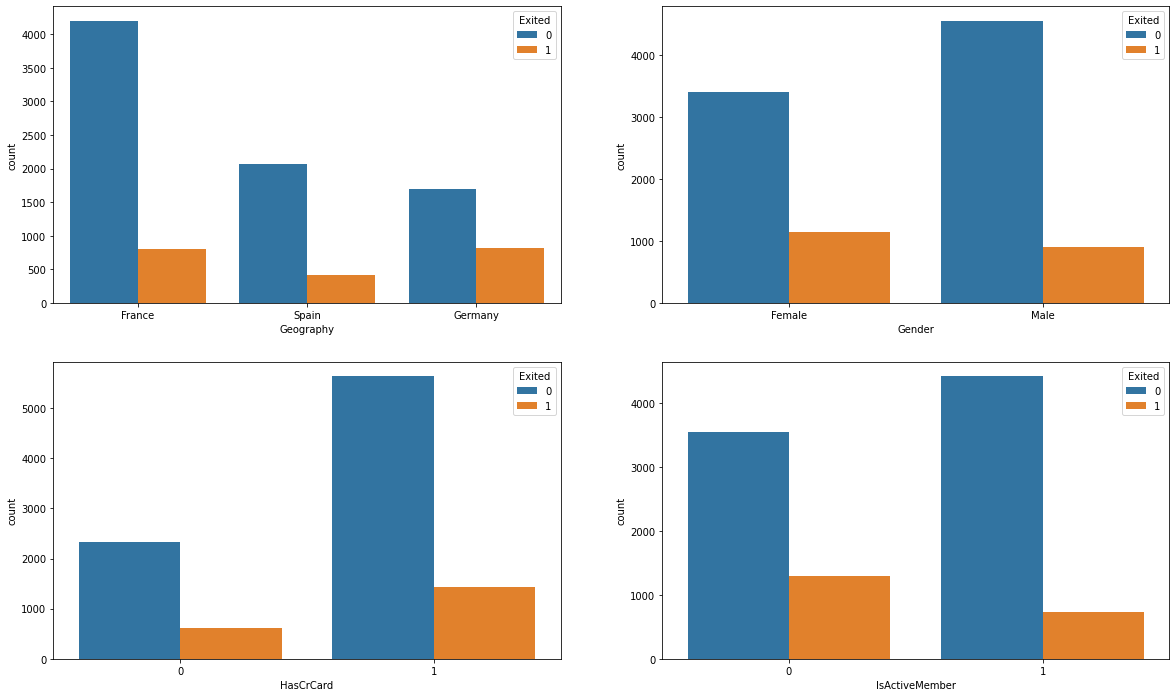

In [ ]:
   # We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = new_df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = new_df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = new_df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = new_df, ax=axarr[1][1])

We note the following:

Majority of the data is from persons from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.

The proportion of female customers churning is also greater than that of male customers.

Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.

Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.


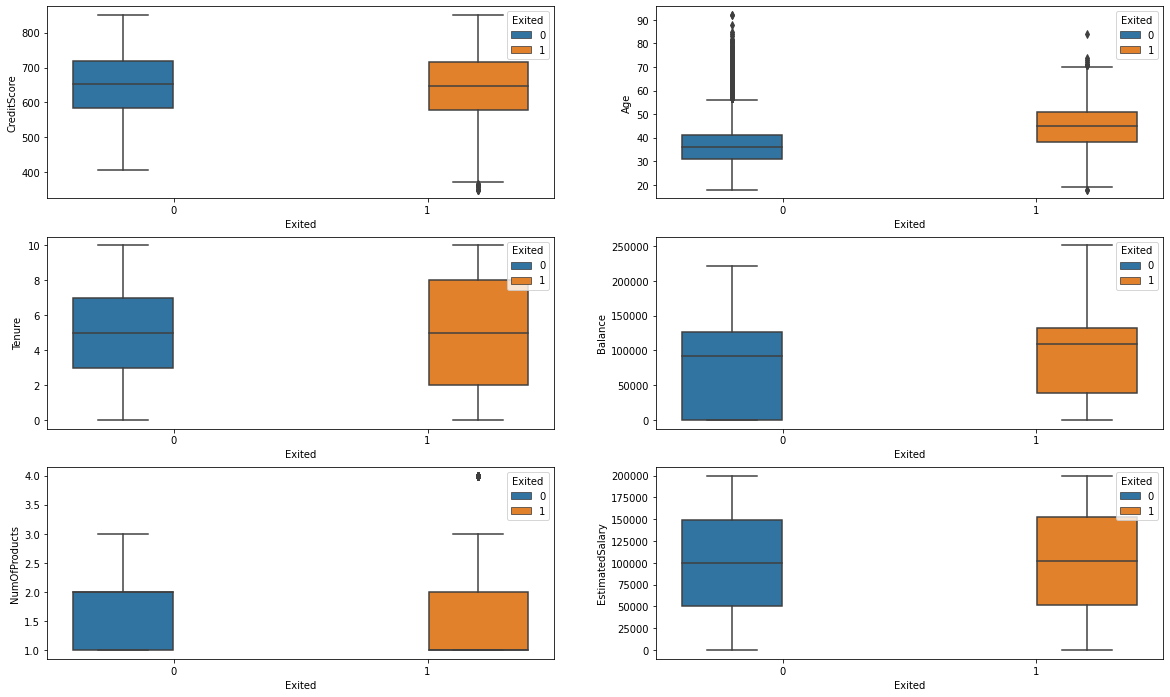

In [ ]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = new_df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = new_df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = new_df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = new_df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = new_df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = new_df, ax=axarr[2][1])


We note the following:

There is no significant difference in the credit score distribution between retained and churned customers.

The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups

With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.

Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.

Neither the product nor the salary has a significant effect on the likelihood to churn.

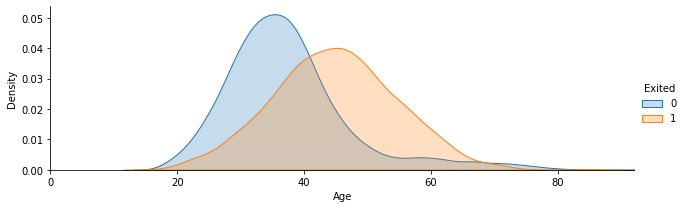

In [ ]:
facet = sns.FacetGrid(new_df, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Age",shade= True)
facet.set(xlim=(0, new_df["Age"].max()))
facet.add_legend()

plt.show()

**Above distribution shows older age customers have high chances of churn.**

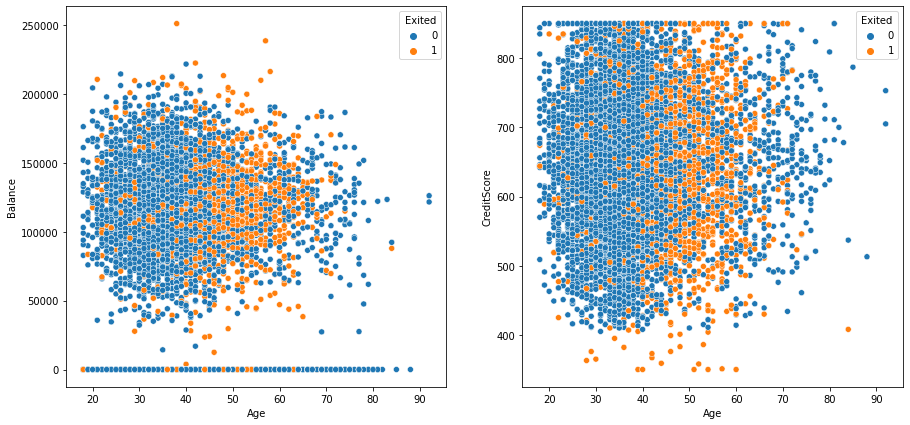

In [ ]:
_, ax =  plt.subplots(1, 2, figsize=(15, 7))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.scatterplot(x = "Age", y = "Balance", hue = "Exited",
cmap = cmap, sizes = (10, 200), data = new_df, ax=ax[0])
sns.scatterplot(x = "Age", y = "CreditScore", hue = "Exited",
cmap = cmap, sizes = (10, 200), data = new_df, ax=ax[1])

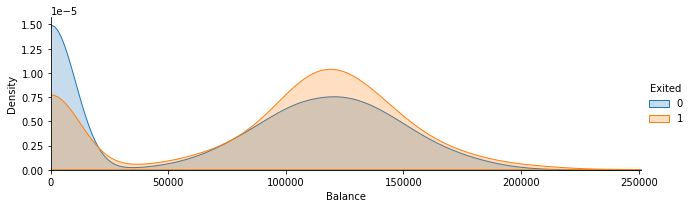

In [ ]:
facet = sns.FacetGrid(new_df, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Balance",shade= True)
facet.set(xlim=(0, new_df["Balance"].max()))
facet.add_legend()

plt.show()

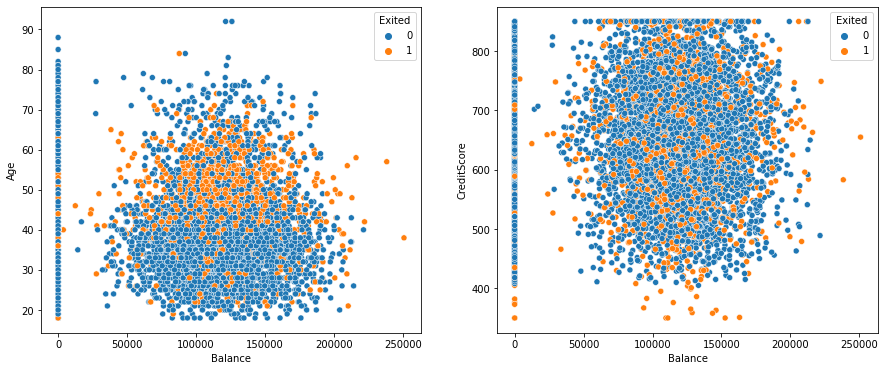

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(x = "Balance", y = "Age", data = new_df, hue="Exited", ax = ax[0])
sns.scatterplot(x = "Balance", y = "CreditScore", data = new_df, hue="Exited", ax = ax[1])

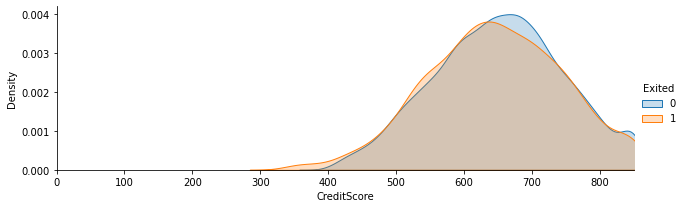

In [ ]:
facet = sns.FacetGrid(new_df, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"CreditScore",shade= True)
facet.set(xlim=(0, new_df["CreditScore"].max()))
facet.add_legend()

plt.show()

**checking corelation between all features**

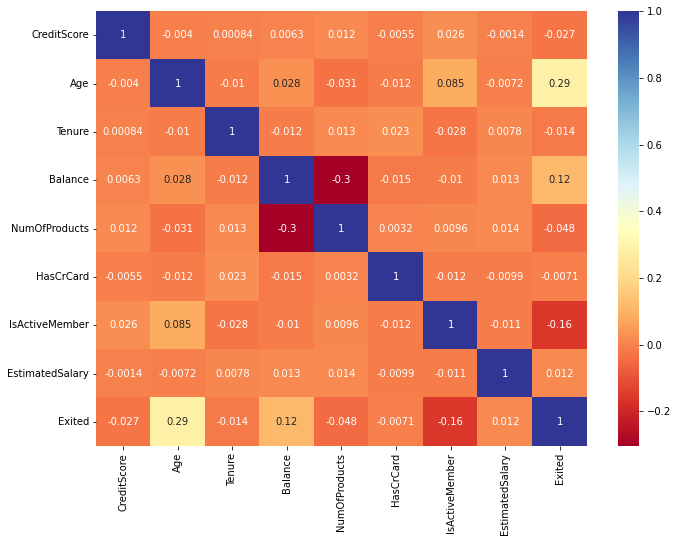

In [ ]:
plt.subplots(figsize=(11,8))
sns.heatmap(new_df.corr(), annot=True, cmap="RdYlBu")
plt.show()

In [10]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(data = new_df)
df_scaled[:] = scaler.fit_transform(new_df[:])

In [11]:
df_scaled.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0
